## Linnear Regression

### Feature Selection

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline
%run -i ../../tools/label_encoder.py

In [164]:
data_2000 = pd.read_csv('../../DatosFTPICFES/SABER11/SB11-BASES_DE_DATOS/READY/2000_1.csv', delimiter = ';')

In [166]:
data_2000.shape

(77508, 53)

In [167]:
data_2000 = label_encoder(data_2000)

In [169]:
y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
          'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']
X_list = data_2000.columns.difference(y_list)

In [174]:
X = data_2000.filter(items=X_list)
Y = data_2000.filter(items=y_list)

In [ ]:
estimator = SVR(kernel = 'linear')
selector = RFE(estimator, 40, step = 1)
selector = selector.fit(X,Y['PUNT_BIOLOGIA'])

In [ ]:
selector.support_

In [ ]:
selector.ranking_

### TREATMENT OF THE MULTICOLLINEARITY

We can see that the SUBJECT's Scores are related to this other columns
* ['FAMI_INGRESO_FMILIAR_MENSUAL', 'FAMI_INGRESO_FMILIAR_MENSUAL', 'FAMI_EDUCA_PADRE', 'FAMI_EDUCA_PADRE']

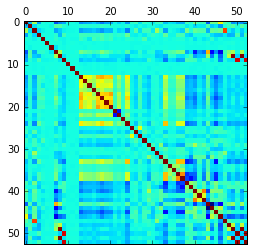

In [171]:
plt.matshow(data_2000.corr())

In [162]:
correl = data_2000.corr()

In [163]:
correl.iloc[33:37, 30:36]

FAMI_APORTANTES  FAMI_INGRESO_FMILIAR_MENSUAL  \
FAMI_LEE_ESCRIBE_MADRE        -0.020275                      0.097721   
FAMI_EDUCA_PADRE               0.009198                      0.525151   
FAMI_EDUCA_MADRE               0.030821                      0.529650   
FAMI_OCUPA_PADRE              -0.029964                     -0.348327   

                        FAMI_LEE_ESCRIBE_PADRE  FAMI_LEE_ESCRIBE_MADRE  \
FAMI_LEE_ESCRIBE_MADRE                0.245312                1.000000   
FAMI_EDUCA_PADRE                      0.274464                0.143939   
FAMI_EDUCA_MADRE                      0.136924                0.285866   
FAMI_OCUPA_PADRE                     -0.070992               -0.073242   

                        FAMI_EDUCA_PADRE  FAMI_EDUCA_MADRE  
FAMI_LEE_ESCRIBE_MADRE          0.143939          0.285866  
FAMI_EDUCA_PADRE                1.000000          0.622491  
FAMI_EDUCA_MADRE                0.622491          1.000000  
FAMI_OCUPA_PADRE               -0.324960         -0.291868

Here we can see the relations between the columns without the scores

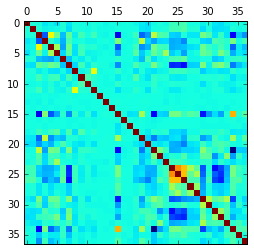

In [175]:
plt.matshow(X.corr())#, cmap='Greys_r')

In [176]:
correlation = X.corr()

In [177]:
#correlation.iloc[12:18, :6] #COLE_COD_ICFES y NACIMIENTO_ANNO
correlation.iloc[33:35, 13:16]

ESTU_LIMITA_MOTRIZ  ESTU_LIMITA_SORDONOINTERPRETE  \
FAMI_PERSONAS_HOGAR            0.003888                      -0.010856   
FAMI_SOST_PERSONAL            -0.003936                       0.000450   

                     ESTU_NACIMIENTO_ANNO  
FAMI_PERSONAS_HOGAR              0.027944  
FAMI_SOST_PERSONAL               0.555296

#### THIS CHANGES WILL BE EXECUTED IMMEDIATELY
* We see that there are correlations between the columns that has information about departments and municipalities, SO just one of each class will remain
* We see that there are correlations between the column COLE_JORNADA and COLE_BILINGUE, so COLE_JORNADA will remain, because COLE_BILINGUE had like more than 90% of NaN values, and was filled intuitively


In [173]:
data_2000.drop(['COLE_DEPTO_UBICACION', 'COLE_MCPIO_UBICACION', 'ESTU_DEPTO_PRESENTACION', 'ESTU_MCPIO_PRESENTACION',
                'COLE_BILINGUE', 'FAMI_POSICION_HERMANOS'], axis=1, inplace=True)

In [180]:
D_sorted = data_2000.sort_values(by='PUNT_BIOLOGIA')
X = D_sorted.filter(items=X_list)
Y = D_sorted.filter(items=y_list)
LR = LinearRegression()
LR.fit(X, Y['PUNT_BIOLOGIA'])
LR.score(X, Y['PUNT_BIOLOGIA'])

0.20968795304890042

## POLYNOMIAL

In [181]:
y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
          'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']
X_list = D_sorted.columns.difference(y_list)

In [182]:
New_X = D_sorted.filter(items = X_list)
Cubed_X = New_X**3
Y_train = D_sorted.filter(items = y_list)

In [183]:
LR3 = LinearRegression()
LR3.fit(Cubed_X, Y_train['PUNT_BIOLOGIA'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [184]:
print('Score:', LR3.score(Cubed_X, Y_train['PUNT_BIOLOGIA'])*100)
LR_Statistics(Cubed_X, Y_train['PUNT_BIOLOGIA'], LR3.predict(Cubed_X))

Score: 19.1310852829
SSD: 2614902.215512751 RSE: 5.80840997856 Y's Mean: 44.669001909480315 error: 13.0032231083


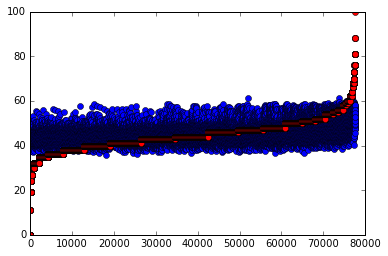

In [137]:
plt.plot(range(Y.shape[0]), LR3.predict(Cubed_X), 'bo')
plt.plot(range(Y.shape[0]), Y_train['PUNT_BIOLOGIA'], 'ro')

SQUARED

In [189]:
New_X = D_sorted.filter(items = X_list)
Squared_X = New_X**2
Y_train = D_sorted.filter(items = y_list)

In [190]:
LR2 = LinearRegression()
LR2.fit(Squared_X, Y_train['PUNT_BIOLOGIA'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [191]:
print('Score:', LR2.score(Squared_X, Y_train['PUNT_BIOLOGIA'])*100)
LR_Statistics(Squared_X, Y_train['PUNT_BIOLOGIA'], LR2.predict(Squared_X))

Score: 20.246091105
SSD: 2578848.421482881 RSE: 5.76822834575 Y's Mean: 44.669001909480315 error: 12.9132689319


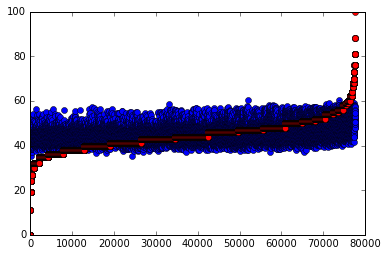

In [188]:
plt.plot(range(Y.shape[0]), LR2.predict(Squared_X), 'bo')
plt.plot(range(Y.shape[0]), Y_train['PUNT_BIOLOGIA'], 'ro')

### Polynomial Regression with Polynomial Features

first with degree = 2

In [213]:
D_sorted = data_2000.sort_values(by='PUNT_BIOLOGIA')
New_X = D_sorted.filter(items = X_list)
New_Y = D_sorted.filter(items = y_list)

In [214]:
Poly = PolynomialFeatures(degree=2)
Poly_X = Poly.fit_transform(New_X)

In [215]:
LR_Poly = LinearRegression()
LR_Poly.fit(Poly_X, New_Y['PUNT_BIOLOGIA'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [219]:
print('Score:', LR_Poly.score(Poly_X, New_Y['PUNT_BIOLOGIA'])*100)
LR_Statistics(Poly_X, New_Y['PUNT_BIOLOGIA'], LR_Poly.predict(Poly_X))

Score: 25.9914193487
SSD o R²: 2393072.8165321983 RSE: 5.55657899807 Y's Mean: 44.669001909480315 error: 12.4394518806


Now degree = 3

In [222]:
D_sorted = data_2000.sort_values(by='PUNT_BIOLOGIA')
New_3_X = D_sorted.filter(items = X_list)
New_3_Y = D_sorted.filter(items = y_list)

In [223]:
Poly = PolynomialFeatures(degree=3)
Poly_X3 = Poly.fit_transform(New_X)

In [224]:
LR_Poly = LinearRegression()
LR_Poly.fit(Poly_X3, New_Y['PUNT_BIOLOGIA'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [225]:
print('Score:', LR_Poly.score(Poly_X3, New_Y['PUNT_BIOLOGIA'])*100)
LR_Statistics(Poly_X3, New_Y['PUNT_BIOLOGIA'], LR_Poly.predict(Poly_X3))

Score: 33.8700196591
SSD o R²: 2138317.7047695536 RSE: 5.25249505546 Y's Mean: 44.669001909480315 error: 11.7587025251


# Estadisticos y Errores

In [220]:
def LR_Statistics(X, Y, Y_pred):
    """Estimate the R2, Std deviation, the mean of the target and the Error"""
    SSD = np.sum((Y-Y_pred)**2)
    RSE = np.sqrt(SSD/(len(X)-1))
    y_mean = np.mean(Y)
    error = RSE/y_mean
    #SSD o R² = Sum of Squared Differences
    #RSE o Std Deviation = Standard Deviation
    print('SSD o R²:', SSD, 'RSE:', RSE, "Y's Mean:", y_mean, 'error:', error*100)

{'boxes': [<matplotlib.lines.Line2D at 0x7f33be739ef0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f33be506940>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f33be50cac8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f33be50c2b0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f33be4fe8d0>,
  <matplotlib.lines.Line2D at 0x7f33be4fe9e8>]}

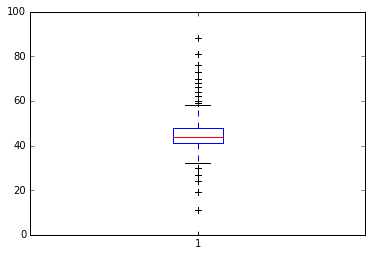

In [192]:
plt.boxplot(Y_train['PUNT_BIOLOGIA'])

# Plots of the Targets

In [193]:
y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
          'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']
X_list = D_sorted.columns.difference(y_list)

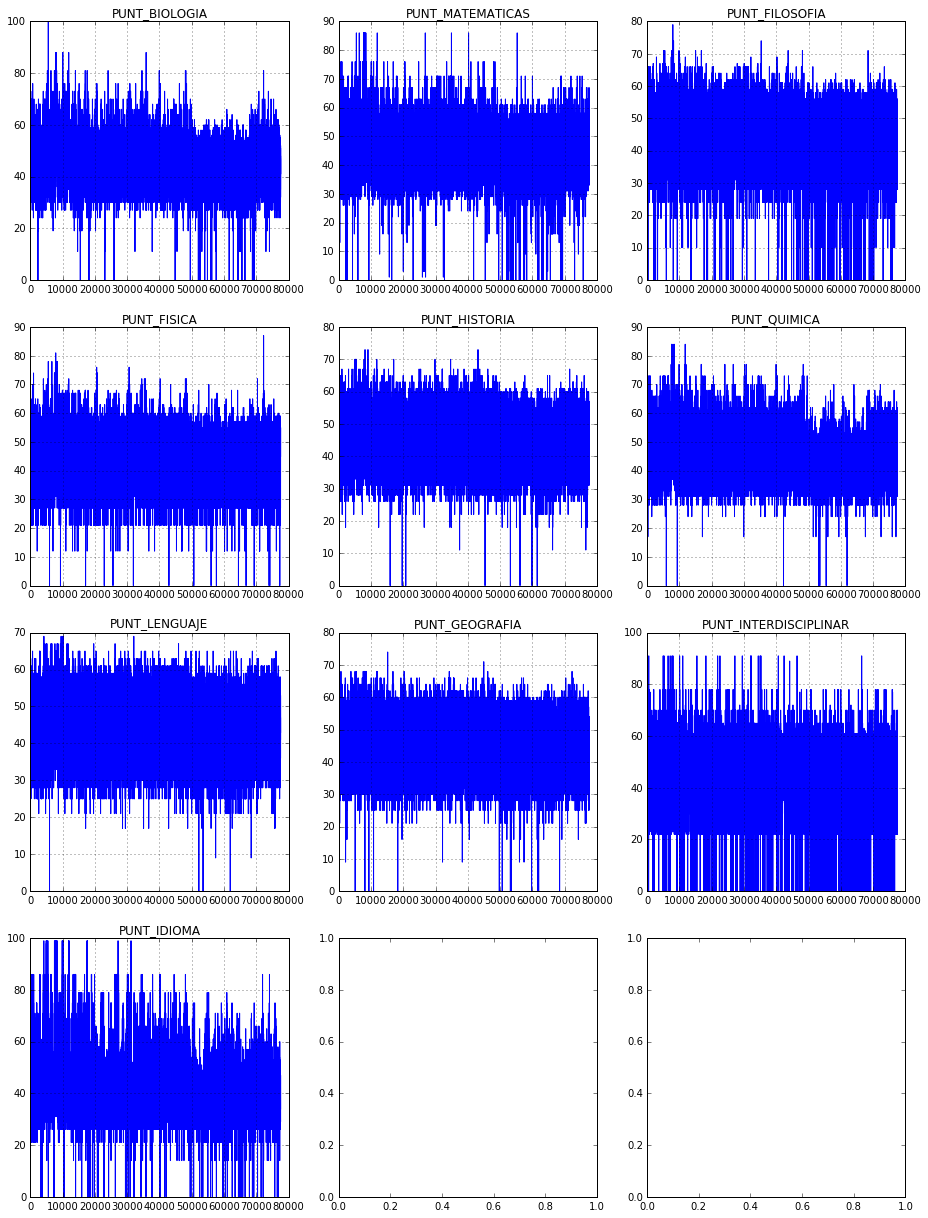

In [199]:
fig, axes = plt.subplots(4, 3, sharex=False, figsize=(13, 17))
axs = [i for i in axes.flatten()]
for n, i in enumerate(y_list):
    New_X = data_2000.filter(items = X_list)
    New_Y = data_2000.filter(items = y_list)
    ax = axs[n]
    ax.plot(range(New_Y.shape[0]), New_Y[i])
    ax.set_title(i)
    ax.grid()
plt.tight_layout(h_pad=2)

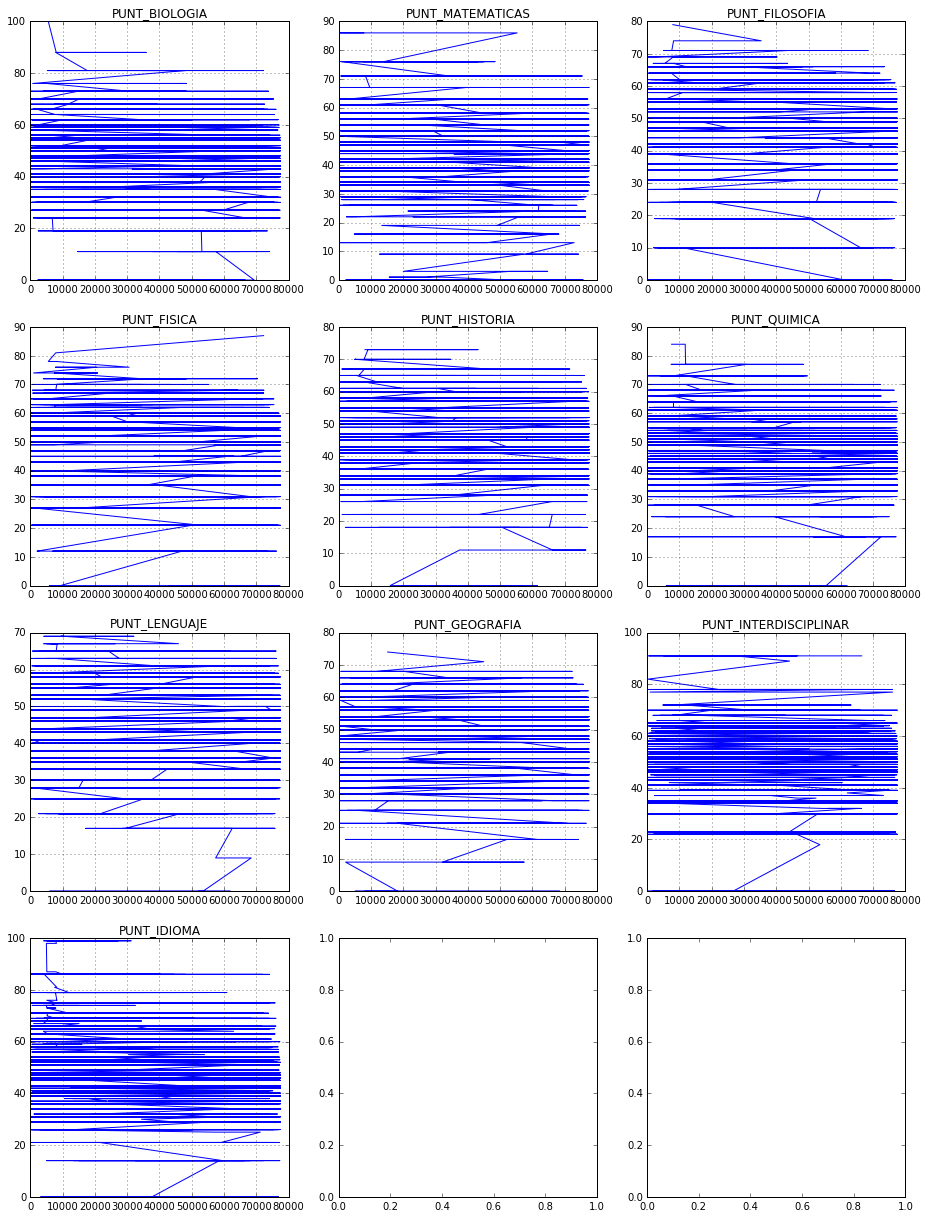

In [197]:
fig, axes = plt.subplots(4, 3, sharex=False, figsize=(13, 17))
axs = [i for i in axes.flatten()]
for n, i in enumerate(y_list):
    D_sorted = data_2000.sort_values(by=i)
    New_X = D_sorted.filter(items = X_list)
    New_Y = D_sorted.filter(items = y_list)
    ax = axs[n]
    ax.plot(New_Y[i])
    ax.set_title(i)
    ax.grid()
plt.tight_layout(h_pad=2)

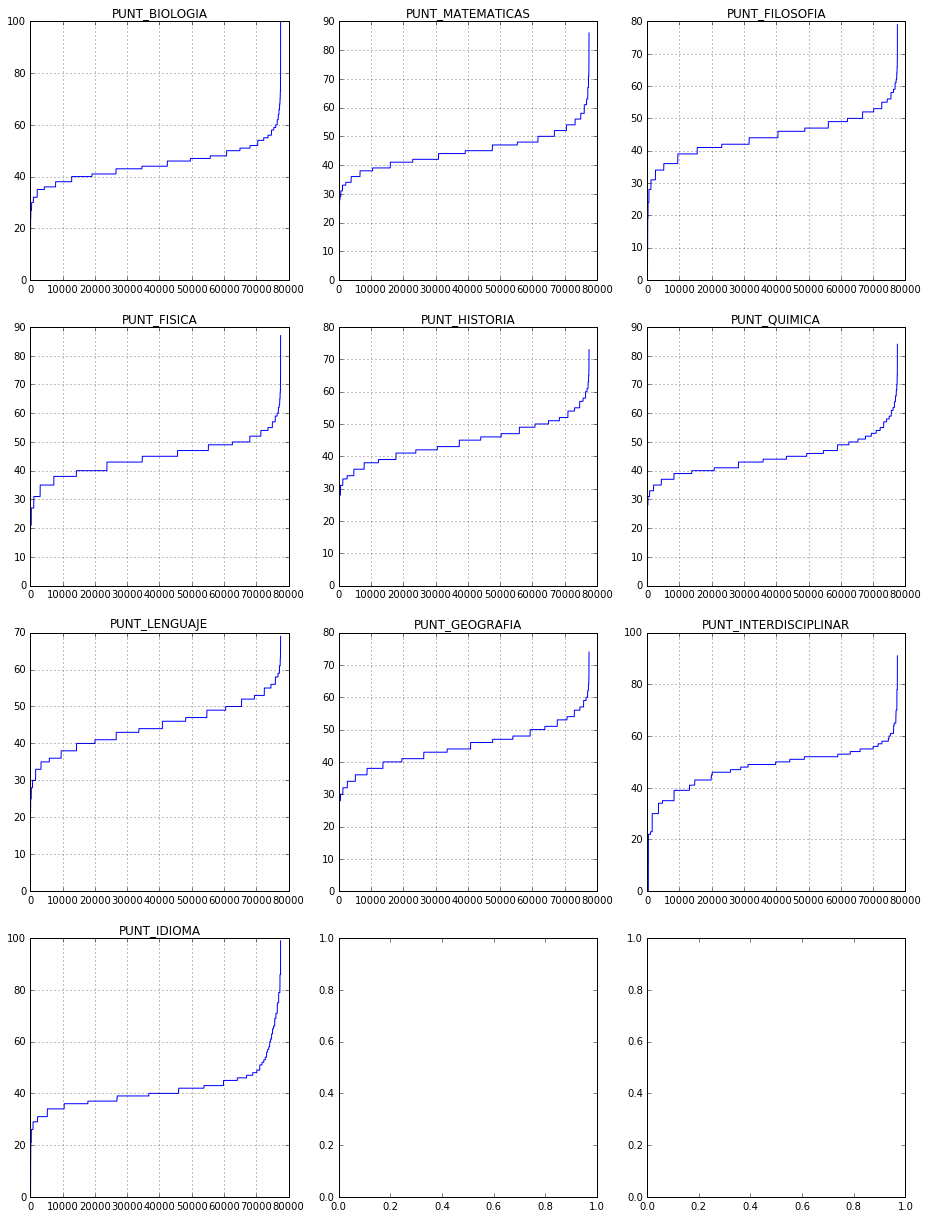

In [196]:
fig, axes = plt.subplots(4, 3, sharex=False, figsize=(13, 17))
axs = [i for i in axes.flatten()]
for n, i in enumerate(y_list):
    D_sorted = data_2000.sort_values(by=i)
    New_X = D_sorted.filter(items = X_list)
    New_Y = D_sorted.filter(items = y_list)
    #dic = Geo_Groups.get_group(i)
    ax = axs[n]
    ax.plot(range(New_Y.shape[0]), New_Y[i])
    ax.set_title(i)
    ax.grid()
plt.tight_layout(h_pad=2)